# Regression Analysis

## Part 1: Introduction

Regression analysis is a statistical procedure for estimating the relationship between
a target variable and a set of potentially relevant variables. In this project, we explore
basic regression models on a given dataset, along with basic techniques to handle over-
fitting; namely cross-validation, and regularization. With cross-validation, we test for
over-fitting, while with regularization we penalize overly complex models.

### Importing required libraries

In [277]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn

### Load Data

In [278]:
data=pd.read_csv('./network_backup_dataset.csv')

In [279]:
data.head()

,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour)
0,1,Monday,1,work_flow_0,File_0,0.0,0
1,1,Monday,1,work_flow_2,File_12,0.0,0
2,1,Monday,1,work_flow_2,File_13,0.0,0
3,1,Monday,1,work_flow_2,File_14,0.0,0
4,1,Monday,1,work_flow_2,File_16,0.0,0


For a twenty-day period (X-axis unit is day number) plot the backup sizes for
all workflows (color coded on the Y-axis),

### Adding up Size of Back up data for each workflow for each day for each week.

In [280]:
x = data.groupby(['Week #','Day of Week','Work-Flow-ID'])['Size of Backup (GB)'].sum().reset_index()
x.head()

,Week #,Day of Week,Work-Flow-ID,Size of Backup (GB)
0,1,Friday,work_flow_0,4.144343
1,1,Friday,work_flow_1,0.035940
2,1,Friday,work_flow_2,2.349225
3,1,Friday,work_flow_3,0.414078
4,1,Friday,work_flow_4,2.932473


### Creating an array of the x

In [281]:
temp = x.values
temp

array([[1, 'Friday', 'work_flow_0', 4.144343191075862],
       [1, 'Friday', 'work_flow_1', 0.03593991494833041],
       [1, 'Friday', 'work_flow_2', 2.3492254005076614],
       ...,
       [15, 'Wednesday', 'work_flow_2', 0.030602466726650988],
       [15, 'Wednesday', 'work_flow_3', 0.022457411264313495],
       [15, 'Wednesday', 'work_flow_4', 3.0694460283617646]], dtype=object)

### Creating function for numbering the days of the week

In [282]:
def my(xlist):
    dict = {"Monday":1, "Tuesday":2 , "Wednesday" : 3, "Thursday": 4, "Friday":5, "Saturday" : 6, "Sunday": 7} 
    xlist[1] = dict[xlist[1]]
    return xlist

In [283]:
temp_changed = list(map(my,temp))

### Creating dataframe of temp

In [284]:
temp_df = pd.DataFrame(temp_changed)
temp_df.head()

,0,1,2,3
0,1,5,work_flow_0,4.144343
1,1,5,work_flow_1,0.035940
2,1,5,work_flow_2,2.349225
3,1,5,work_flow_3,0.414078
4,1,5,work_flow_4,2.932473


In [285]:
temp_df.sort_values(by =[0,1], inplace=True) # sorting values in ascending order of days(Mon:1, Tues: 2)
#temp = temp.values
temp_df.head()

,0,1,2,3
5,1,1,work_flow_0,3.877791
6,1,1,work_flow_1,10.072163
7,1,1,work_flow_2,0.019199
8,1,1,work_flow_3,0.020530
9,1,1,work_flow_4,2.672759


In [286]:
temp_v = temp_df.values

### Plotting figure 

20 days

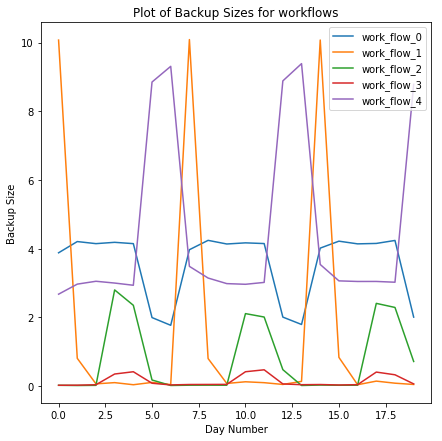

In [287]:
x = range(0,20)
plt.figure(figsize=(7,7))
plt.title("Plot of Backup Sizes for workflows")
plt.xlabel("Day Number")
plt.ylabel("Backup Size")

for i in ['work_flow_0','work_flow_1','work_flow_2','work_flow_3','work_flow_4']:
    a = list(filter(lambda x: x[2] == i and x[0] < 4, temp_v)) #x[2] is work_flow_id and x[0] is Week# giving a list of true items
    plot_list = list()
    for k in [1,2,3]: #Week# 20/7 ~ 3
        for j in [1,2,3,4,5,6,7]: #No of days in a week
            plot_list.append(list(filter(lambda x: x[0] == k and x[1] == j, a))[0][3])  #Gives out size of the backup data
    plt.plot(x,plot_list[0:20], label = i)
plt.legend()
plt.savefig("Backup size vs Day number -20 days.png")
plt.show()
plt.close()

105 days

105
105
105
105
105


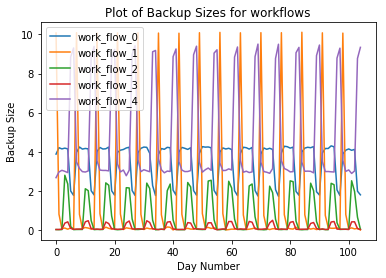

In [288]:
x = range(0,105)
plt.title("Plot of Backup Sizes for workflows")
plt.xlabel("Day Number")
plt.ylabel("Backup Size")

for i in ['work_flow_0','work_flow_1','work_flow_2','work_flow_3','work_flow_4']:
    a = list(filter(lambda x: x[2] == i and x[0] < 16, temp_v))
    plot_list = list()
    for k in range(0,16): #
        for j in [1,2,3,4,5,6,7]:
            q = list(filter(lambda x: x[0] == k and x[1] == j, a))
            if( len(q) > 0): #List doesn't append 0 values to an empty list. For k = 0, q will be an empty array.
                plot_list.append(q[0][3])
    print(len(plot_list))
    plt.plot(x[0:len(plot_list)],plot_list, label = i)
    
plt.legend()
plt.savefig("Backup size vs Day number -105 days.png")
plt.show()
plt.close()

### Predict the backup size of a file given the other attributes.

We use all attributes, except Backup time, as candidate features for the prediction of backup size.

We will try different feature sets, as well as different encoding schemes for each
feature and in combination. For example, each of the five features is a categorical
variable: Day of the week, hour of the day, work-
ow number, file-type, and week
number.
For each categorical variable, we could convert it into a one dimensional numerical value. For example, Day of the Week variable could take on values 1; . . . ; 7
corresponding to Monday through Friday. Similarly, the Hour of the Day could be
encoded as 1 . . . 24. We will refer to this as a scalar encoding.
For each categorical variable that takes one of M values we can also encode it
as an M dimensional vector, where only one entry is 1 and the rest are 0's. Thus
for the Day of the Week, Monday could be encoded as [1, 0, 0, 0, 0, 0, 0] and Friday
as [0, 0, 0, 0, 0, 0, 1]. We will refer to this encoding as One-Hot-Encoding.

#### 1. Linear Regression Model

First convert each categorical feature into one dimensional numerical values
using scalar encoding (e.g. Monday to Sunday can be mapped to 1-7), and
then directly use them to t a basic linear regression model.

* Creating data for model



In [289]:
datanp = np.array(data.values)
X_train = datanp[:,[0,1,2,3,4]] # All attributes except backup hour.
Y_train = datanp[:,[5]] #Size of backup
Y_train = Y_train.flatten() #Return a copy of array into one dimension
Y_train = list(map(float,Y_train)) #Creates a list of floating values on each iterable inside Y_train using map function
Y_train = np.asarray(Y_train) #Convert the input into an array
#Y_train
#X_train

* Convert categorial features

**LabelEncoder()**

Encode labels with value between 0 and n_classes-1.

In [290]:
for i in range(0,5):
    labelencoder_X_0 = LabelEncoder() #Creating an instance of LabelEncoder
    X_train[:,i] = labelencoder_X_0.fit_transform(X_train[:,i]) #Converts each value into a coded number of respective category

#X_train

* Creating Linear Regression model.

In [291]:
def LR_train(X_train,Y_train):
    lr = LinearRegression() #Instance of LR class
    lr.fit(X_train, Y_train) #Fitting data
    predictions = lr.predict(X_train) #Predicting on X_train
    residual = np.absolute(predictions-Y_train) #Residuals
    print("Average Train RMSE for Linear Regression:")
    print(math.sqrt(metrics.mean_squared_error(Y_train, lr.predict(X_train)))) # Root mean squared error regression loss
    return predictions, Y_train

In [292]:
predictions, tempy= LR_train(X_train,Y_train)

Average Train RMSE for Linear Regression:
0.10183957431617968


In [293]:
def plot_un(predictions, Y_train, param):
    plt.close() #Closes any previous plot
    plt.figure(figsize=(7,7)) #Creating an empty figure of the given size of 7by7 grids
    plt.xlabel("Time") #Creating Xlabel
    plt.ylabel("Fitted Values vs True Values") #Putting ylabel
    plt.scatter(range(0,len(Y_train)),Y_train,label='True') #Plotting a scatterplot for true values and putting given label
    plt.scatter(range(0,len(Y_train)),predictions, label ='Fitted') #Plotting a scatterplot for prediction values and putting given label
    plt.legend() #Creating a legend of labels
    plt.savefig(param+"_un_1.png") #Saving file
    plt.show() 
    plt.close()

    plt.figure(figsize=(7,7))
    plt.xlabel("True Values")
    plt.ylabel("Predictions Values")
    plt.scatter(Y_train,predictions) #Plotting a scatterplot of true values and prediction values
    plt.savefig(param+"_un_2.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("Time")
    plt.ylabel("Residual Values vs Predicted Values")
    plt.scatter(range(0,len(Y_train)),predictions,label='Fitted')
    plt.scatter(range(0,len(Y_train)),Y_train-predictions, label ='Residual')
    plt.legend()
    plt.savefig(param+"_un_3.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("Prediction Values")
    plt.ylabel("Residual Values")
    plt.scatter(predictions,Y_train-predictions)
    plt.savefig(param+"_un_4.png")
    plt.show()
    plt.close()


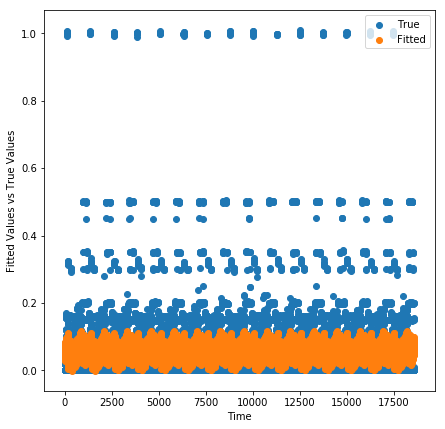

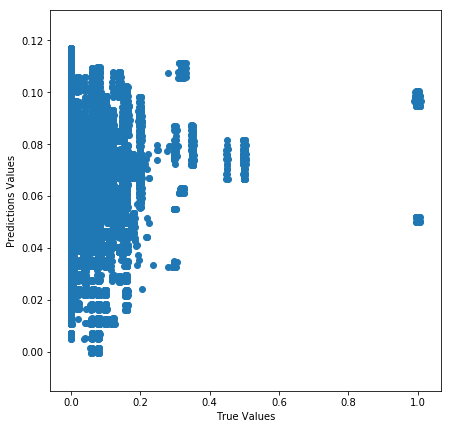

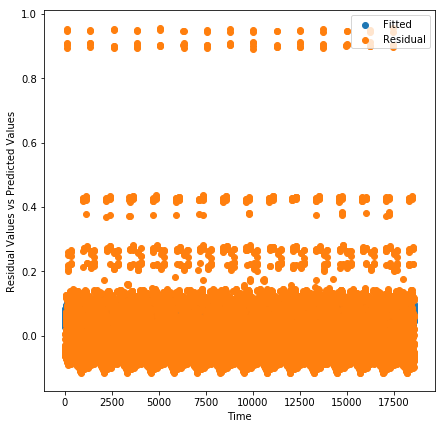

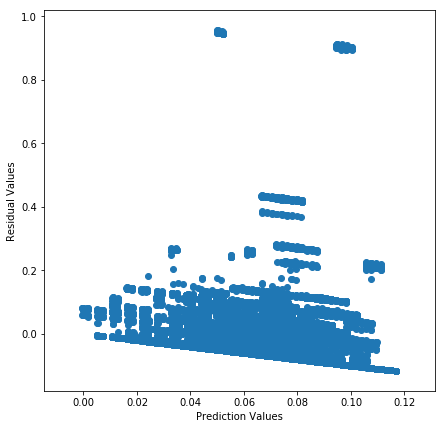

In [294]:
plot_un(predictions,tempy,"SimpleBaseline")

* Plot 1: We plot the fitted values against the true values over the number of data points. As we can see from the plots, the true values range upto 1, whereas the fitted values range upto around 0.1, which means that this baseline model doesn’t predict the higher values correctly.
* Plot 2: We plot predicted values against true values. As we can see in the plot, there is a linear trend in the scatter plot, and it is known that more the linear relation, more accurate is the model. Also, we see some outlier values for the true value of 1, which confirms the previous inference, that our model doesn’t predict accurately for the higher true values. 
* Plot 3: We plot the residuals versus the fitted values scattered over the number of data points. Also, from the plot, we can see that the residual values range upto 1, which means the accuracy is low for this model.
* Plot 4: We plot residual values against the predicted values. The plot conforms to the previous three plots’ inferences. 

In [295]:
def LR_train_cf(X_train,Y_train):
    kf = KFold(n_splits = 10) #K-Folds cross-validator: Provides train/test indices to split data in train/test sets.
    train_rmse = list() #Creating an empty list to store rmse values for train set
    test_rmse = list() #Creating an empty list to store rmse values for test set
    kf.get_n_splits(X_train) #Returns the number of splitting iterations in the cross-validator
    for train, test in kf.split(X_train): #Generate indices to split data into training and test set.
        lr = LinearRegression() #Creating an instance of LR model
        lr.fit(X_train[train], Y_train[train]) #Fitting the model for training set to learn parameters
        train_rmse.append(math.sqrt(metrics.mean_squared_error(Y_train[train], lr.predict(X_train[train])))) #For every 1 split of trainset acting as test and rest 9 as train in CV , we get an rmse
        test_rmse.append(math.sqrt(metrics.mean_squared_error(Y_train[test], lr.predict(X_train[test]))))
    print("Average Train RMSE for Linear Regression:")
    print(np.average(train_rmse))
    print("Average Test RMSE for Linear Regression:")
    print(np.average(test_rmse))
    return np.average(train_rmse),np.average(test_rmse)

In [296]:
LR_train_cf(X_train,Y_train)

Average Train RMSE for Linear Regression:
0.10183388043738155
Average Test RMSE for Linear Regression:
0.10190086169431864


(0.10183388043738155, 0.10190086169431864)

### Data Preprocessing: 
Standardize  all these numerical features, then fit and test the model.

In [297]:
sc = sklearn.preprocessing.StandardScaler() #Creating an instance of StandardScaler
temp = sc.fit_transform(X_train) #Fit to data, then transform it.
predictions, tempy= LR_train(temp,Y_train)


Average Train RMSE for Linear Regression:
0.10183957431617968


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


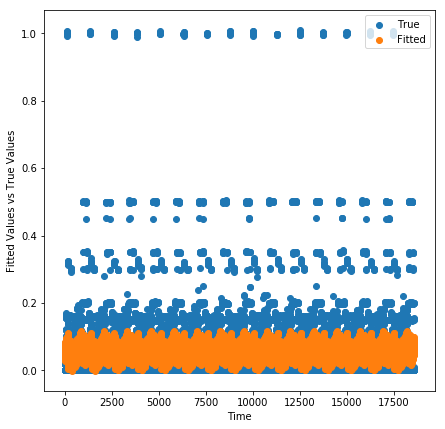

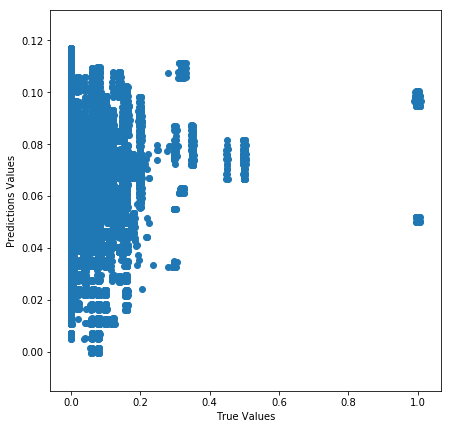

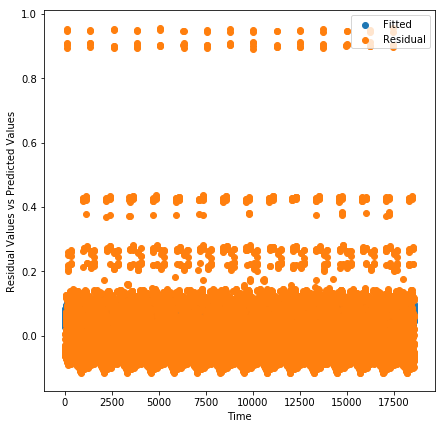

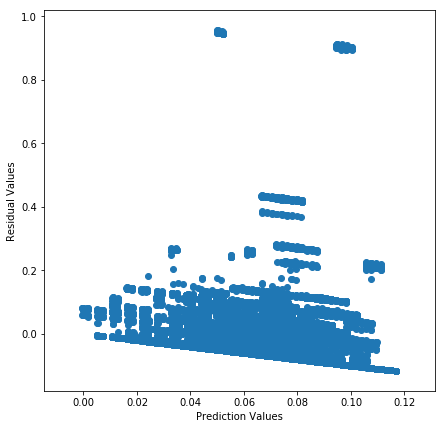

In [298]:
plot_un(predictions,tempy,"Standardization")

In [299]:
LR_train_cf(temp,tempy)

Average Train RMSE for Linear Regression:
0.10183388043738155
Average Test RMSE for Linear Regression:
0.10190086169431864


(0.10183388043738155, 0.10190086169431864)

**After standardizing, we can see that the accuracy of the model doesn’t differ much, as we
observe similar plots, as the baseline model.**

## Feature Selection

Use f regression and mutual information regression
measure to select three most important variables respectively.

### F-regression

In [300]:
#sklearn.feature_selection.SelectKBest : Select features according to the k highest scores.
#sklearn.feature_selection.f_regression: Univariate linear regression tests.
fs = sklearn.feature_selection.SelectKBest(score_func= sklearn.feature_selection.f_regression, k=3) 

In [301]:
temp_fs = fs.fit_transform(X_train,Y_train) #Fit to data, then transform it.

Features in order:
1. Week #	
2. Day of Week	
3. Backup Start Time - Hour of Day	
4. Work-Flow-ID	
5. File Name	

Y:

Size of Backup (GB)

scores_ : array-like, shape=(n_features,)
    Scores of features.

pvalues_ : array-like, shape=(n_features,)
    p-values of feature scores

In [302]:
print(fs.scores_)

[8.45006257e-03 2.20612122e+02 1.50740934e+02 2.61386654e+01
 4.60786474e+02]


**Looking at scores values, Day of Week, Backup Start Time -Hour of day, File name are 3 most important variables.**

In [303]:
print(fs.pvalues_)

[9.26759237e-001 1.28086967e-049 1.62474985e-034 3.20909922e-007
 5.44826905e-101]


In [304]:
predictions, tempy= LR_train(temp_fs,Y_train)

Average Train RMSE for Linear Regression:
0.10187304802506295


In [305]:
LR_train_cf(temp_fs,tempy)

Average Train RMSE for Linear Regression:
0.10187156467494533
Average Test RMSE for Linear Regression:
0.1018601961390091


(0.10187156467494533, 0.1018601961390091)

### Mutual information regression measure

In [306]:
#sklearn.feature_selection.SelectKBest : Select features according to the k highest scores.
#sklearn.feature_selection.mutual_info_regression:Mutual information (MI) [1]_ between two random variables is a non-negative
# value, which measures the dependency between the variables.
fs = sklearn.feature_selection.SelectKBest(score_func= sklearn.feature_selection.mutual_info_regression, k=3)

In [307]:
tempx = fs.fit_transform(X_train,Y_train)

In [308]:
print(fs.scores_)

[0.01046037 0.23812071 0.30311727 0.77294644 0.77158999]


Looking at scores values, Backup Start Time - Hour of Day, Work-Flow-ID	,File Name are the 3 most important variables.

In [309]:
print(fs.pvalues_)

None


In [310]:
predictions, tempy= LR_train(tempx,Y_train)

Average Train RMSE for Linear Regression:
0.10246950896059306


In [311]:
LR_train_cf(tempx,tempy)

Average Train RMSE for Linear Regression:
0.10246478527301542
Average Test RMSE for Linear Regression:
0.10249650490404767


(0.10246478527301542, 0.10249650490404767)

### Feature encoding

In [321]:
X_train

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 2, 4],
       [0, 1, 0, 2, 5],
       ...,
       [14, 3, 5, 4, 19],
       [14, 3, 5, 4, 18],
       [14, 3, 5, 4, 17]], dtype=object)

**OneHotEncoder**

Encode categorical integer features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or
strings, denoting the values taken on by categorical (discrete) features.
The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
encoding scheme. This creates a binary column for each category and
returns a sparse matrix or dense array.


In [322]:
def transform(X_train, trans_list):
    hot = list()
    for i in range(0, len(trans_list)):
        if(trans_list[i] == 1):
            hot.append(i)
    onehotencoder = OneHotEncoder(categorical_features = hot, sparse = False)
    return onehotencoder.fit_transform(X_train)


In [323]:
train_rmse = list()
test_rmse = list()
minr = 100
min_list = list()
for i in [0,1]:
    for j in [0,1]:
        for k in [0,1]:
            for l in [0,1]:
                for m in [0,1]:
                    temp_t = X_train
                    if [i,j,k,l,m] == [0,0,0,0,0]:
                        x,y = LR_train_cf(X_train,Y_train)
                    else:
                        temp_t = transform(temp_t,[i,j,k,l,m])
                        x,y = LR_train_cf(temp_t,Y_train)
                    train_rmse.append(x)
                    test_rmse.append(y)
                    if(y < minr):
                        min_list = [i,j,k,l,m]
                        minr = y

Average Train RMSE for Linear Regression:
0.10183388043738155
Average Test RMSE for Linear Regression:
0.10190086169431864


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.09079198466554707
Average Test RMSE for Linear Regression:
0.09082862387420068
Average Train RMSE for Linear Regression:
0.09079494684763507
Average Test RMSE for Linear Regression:
0.09081760946447037


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: 

Average Train RMSE for Linear Regression:
0.09083939630994904
Average Test RMSE for Linear Regression:
0.09089355618507412
Average Train RMSE for Linear Regression:
0.10058522779364258
Average Test RMSE for Linear Regression:
0.10066921732759851


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: 

Average Train RMSE for Linear Regression:
0.08938361025682569
Average Test RMSE for Linear Regression:
0.08943744343339552
Average Train RMSE for Linear Regression:

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)



0.08938471777752188
Average Test RMSE for Linear Regression:
0.08943844370090198


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08938279261533433
Average Test RMSE for Linear Regression:
0.0894409407252891
Average Train RMSE for Linear Regression:
0.1008895726002943
Average Test RMSE for Linear Regression:
0.10093874325771957


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: 

Average Train RMSE for Linear Regression:
0.08975450522864012
Average Test RMSE for Linear Regression:
0.08976821933945016


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.0897554385324543
Average Test RMSE for Linear Regression:
0.08976523029596364


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08975406144156436
Average Test RMSE for Linear Regression:
0.08977400934519372


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.09963677489166281
Average Test RMSE for Linear Regression:
0.09970321084332043


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08833696534715908
Average Test RMSE for Linear Regression:
0.08837010047026857


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08833787958154966
Average Test RMSE for Linear Regression:
0.08836635602821377


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08833722189786362
Average Test RMSE for Linear Regression:
0.08836933317005334


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.10182776179654396
Average Test RMSE for Linear Regression:
5923041660.93089


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.09079753549264316
Average Test RMSE for Linear Regression:
21181627199.391556


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.09078735646630118
Average Test RMSE for Linear Regression:
14308152821.124744


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.09082363933167452
Average Test RMSE for Linear Regression:
90046321098.48862


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.10057901613065712
Average Test RMSE for Linear Regression:
5524378476.997965


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08937624754935679
Average Test RMSE for Linear Regression:
22306723152.73376


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08939988220072619
Average Test RMSE for Linear Regression:
17844514629.19599


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08938802555235163
Average Test RMSE for Linear Regression:
30498512839.95768


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.10088669687515668
Average Test RMSE for Linear Regression:
9885148058.989681


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08975290394034527
Average Test RMSE for Linear Regression:
22621962898.048668


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08975331499029002
Average Test RMSE for Linear Regression:
17095322435.955524


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08979001184292462
Average Test RMSE for Linear Regression:
98556309085.62369


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.09963401916969342
Average Test RMSE for Linear Regression:
13985569994.32456


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08834941237158919
Average Test RMSE for Linear Regression:
59856480402.95221


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.0883356578914468
Average Test RMSE for Linear Regression:
14214202333.64378


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08836857318321659
Average Test RMSE for Linear Regression:
702220678513.3916


In [324]:
def plot(RMSE,x,train):
    plt.close()
    plt.plot(x,RMSE)
    plt.title("Average "+ train +" RMSE Values")
    plt.xlabel("All Possible Combination")
    plt.ylabel("RMSE Values")
    plt.savefig(train+"all_possible_comb_rmse.png")
    plt.show()

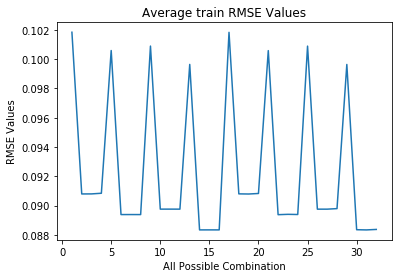

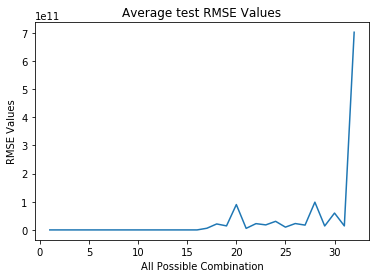

Minimum Test RMSE: 0.08836635602821377
Best Encodings (0: Scalar Encoding, 1: Hot Encoding):[0, 1, 1, 1, 0]


In [325]:
plot(train_rmse,range(1,33),"train")
plot(test_rmse,range(1,33),"test")

print("Minimum Test RMSE: "+str(minr))
print("Best Encodings (0: Scalar Encoding, 1: Hot Encoding):" +str(min_list))

**We observed that, when the variables {day of the week, backup start time, workflow ID} are
hot-encoded, and the variables {week index, file name} are scalar encoded, this combination
achieves the best performance, and the test RMSE for this combination is 0.08836635602821377,
which is an improvement from the previous models.**

**We have found obvious increases in test RMSE compared to training RMSE in some combinations. To solve this problem, you can try the following regularizations:**

* Ridge Regularizer
* Lasso Regularizer
* Elastic Net Regularizer



## Lasso

In [327]:
def Lasso_train_cf(X_train,Y_train):
    kf = KFold(n_splits = 10)
    train_rmse = list()
    test_rmse = list()
    kf.get_n_splits(X_train)
    for train, test in kf.split(X_train):
        lr = sklearn.linear_model.Lasso(alpha = 0.1)
        lr.fit(X_train[train], Y_train[train])
        train_rmse.append(math.sqrt(metrics.mean_squared_error(Y_train[train], lr.predict(X_train[train]))))
        test_rmse.append(math.sqrt(metrics.mean_squared_error(Y_train[test], lr.predict(X_train[test]))))
    return np.average(train_rmse),np.average(test_rmse) 

In [328]:
train_rmse = list()
test_rmse = list()
minr = 100
min_list = list()
for i in [0,1]:
    for j in [0,1]:
        for k in [0,1]:
            for l in [0,1]:
                for m in [0,1]:
                    temp_t = X_train
                    if [i,j,k,l,m] == [0,0,0,0,0]:
                        x,y = Lasso_train_cf(X_train,Y_train)
                    else:
                        temp_t = transform(temp_t,[i,j,k,l,m])
                        x,y = LR_train_cf(temp_t,Y_train)
                    train_rmse.append(x)
                    test_rmse.append(y)
                    if(y < minr):
                        min_list = [i,j,k,l,m]
                        minr = y

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.09079198466554707
Average Test RMSE for Linear Regression:
0.09082862387420068
Average Train RMSE for Linear Regression:
0.09079494684763507
Average Test RMSE for Linear Regression:
0.09081760946447037


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: 

Average Train RMSE for Linear Regression:
0.09083939630994904
Average Test RMSE for Linear Regression:
0.09089355618507412
Average Train RMSE for Linear Regression:
0.10058522779364258
Average Test RMSE for Linear Regression:
0.10066921732759851


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: 

Average Train RMSE for Linear Regression:
0.08938361025682569
Average Test RMSE for Linear Regression:
0.08943744343339552
Average Train RMSE for Linear Regression:
0.08938471777752188
Average Test RMSE for Linear Regression:
0.08943844370090198


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: 

Average Train RMSE for Linear Regression:
0.08938279261533433
Average Test RMSE for Linear Regression:
0.0894409407252891
Average Train RMSE for Linear Regression:
0.1008895726002943
Average Test RMSE for Linear Regression:
0.10093874325771957


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: 

Average Train RMSE for Linear Regression:
0.08975450522864012
Average Test RMSE for Linear Regression:
0.08976821933945016
Average Train RMSE for Linear Regression:

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: 


0.0897554385324543
Average Test RMSE for Linear Regression:
0.08976523029596364
Average Train RMSE for Linear Regression:
0.08975406144156436
Average Test RMSE for Linear Regression:
0.08977400934519372
Average Train RMSE for Linear Regression:

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)



0.09963677489166281
Average Test RMSE for Linear Regression:
0.09970321084332043


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08833696534715908
Average Test RMSE for Linear Regression:
0.08837010047026857


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08833787958154966
Average Test RMSE for Linear Regression:
0.08836635602821377


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08833722189786362
Average Test RMSE for Linear Regression:
0.08836933317005334


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.10182776179654396
Average Test RMSE for Linear Regression:
5923041660.93089


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.09079753549264316
Average Test RMSE for Linear Regression:
21181627199.391556


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.09078735646630118
Average Test RMSE for Linear Regression:
14308152821.124744


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.09082363933167452
Average Test RMSE for Linear Regression:
90046321098.48862


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.10057901613065712
Average Test RMSE for Linear Regression:
5524378476.997965


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08937624754935679
Average Test RMSE for Linear Regression:
22306723152.73376


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08939988220072619
Average Test RMSE for Linear Regression:
17844514629.19599


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08938802555235163
Average Test RMSE for Linear Regression:
30498512839.95768


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.10088669687515668
Average Test RMSE for Linear Regression:
9885148058.989681


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08975290394034527
Average Test RMSE for Linear Regression:
22621962898.048668


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08975331499029002
Average Test RMSE for Linear Regression:
17095322435.955524


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08979001184292462
Average Test RMSE for Linear Regression:
98556309085.62369


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.09963401916969342
Average Test RMSE for Linear Regression:
13985569994.32456


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08834941237158919
Average Test RMSE for Linear Regression:
59856480402.95221


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.0883356578914468
Average Test RMSE for Linear Regression:
14214202333.64378


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Average Train RMSE for Linear Regression:
0.08836857318321659
Average Test RMSE for Linear Regression:
702220678513.3916


In [329]:
print("Minimum Test RMSE: "+str(minr))
print("Best Encodings (0: Scalar Encoding, 1: Hot Encoding):" +str(min_list))


Minimum Test RMSE: 0.08836635602821377
Best Encodings (0: Scalar Encoding, 1: Hot Encoding):[0, 1, 1, 1, 0]


In [334]:
c = {"alpha" : [0.1,0.2,0.4,0.6,0.8,1]}
from sklearn.model_selection import GridSearchCV
temp = X_train
clf = GridSearchCV(sklearn.linear_model.Lasso(), c, cv=10,scoring="neg_mean_squared_error")
clf.fit(temp,Y_train)
print("Best parameters are:")
print(clf.best_params_)

Best parameters are:
{'alpha': 0.1}


## Elastic Net

In [335]:
def Elastic_train_cf(X_train,Y_train):
    kf = KFold(n_splits = 10)
    train_rmse = list()
    test_rmse = list()
    kf.get_n_splits(X_train)
    for train, test in kf.split(X_train):
        lr = sklearn.linear_model.ElasticNet(alpha = 0.2,l1_ratio = 0.4)
        lr.fit(X_train[train], Y_train[train])
        train_rmse.append(math.sqrt(metrics.mean_squared_error(Y_train[train], lr.predict(X_train[train]))))
        test_rmse.append(math.sqrt(metrics.mean_squared_error(Y_train[test], lr.predict(X_train[test]))))
    return np.average(train_rmse),np.average(test_rmse) 


In [336]:
c = {"alpha" : [0.2,0.4,0.6,0.8,1] , "l1_ratio":[0.2,0.4,0.6,0.8,1] }
from sklearn.model_selection import GridSearchCV
temp = X_train
clf = GridSearchCV(sklearn.linear_model.ElasticNet(), c, cv=10,scoring="neg_mean_squared_error")
clf.fit(temp,Y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 0.2, 'l1_ratio': 0.2}


In [337]:
train_rmse = list()
test_rmse = list()
minr = 100
min_list = list()
for i in [0,1]:
    for j in [0,1]:
        for k in [0,1]:
            for l in [0,1]:
                for m in [0,1]:
                    temp_t = X_train
                    if [i,j,k,l,m] == [0,0,0,0,0]:
                        x,y = Lasso_train_cf(X_train,Y_train)
                    else:
                        temp_t = transform(temp_t,[i,j,k,l,m])
                        x,y = Elastic_train_cf(temp_t,Y_train)
                    train_rmse.append(x)
                    test_rmse.append(y)
                    if(y < minr):
                        min_list = [i,j,k,l,m]
                        minr = y

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: 

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: 

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: 

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [338]:
print("Minimum Test RMSE: "+str(minr))
print("Best Encodings (0: Scalar Encoding, 1: Hot Encoding):" +str(min_list))

Minimum Test RMSE: 0.10329395494070304
Best Encodings (0: Scalar Encoding, 1: Hot Encoding):[0, 0, 0, 1, 0]


In [342]:
def plot_r(predictions, Y_train):
    plt.close()
    plt.figure(figsize=(7,7))
    plt.xlabel("Time")
    plt.ylabel("Fitted Values vs True Values")
    plt.scatter(range(0,len(Y_train)),Y_train,label='True')
    plt.scatter(range(0,len(Y_train)),predictions, label ='Fitted')
    plt.legend()
    plt.savefig("ru_1.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("True Values")
    plt.ylabel("Prediction Values")
    plt.scatter(Y_train,predictions)
    plt.savefig("ru_2.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("Time")
    plt.ylabel("Residual Values vs Predicted Values")
    plt.scatter(range(0,len(Y_train)),predictions,label='Fitted')
    plt.scatter(range(0,len(Y_train)),Y_train-predictions, label ='Residual')
    plt.legend()
    
    plt.savefig("ru_3.png")
    plt.show()
    plt.close()
    
    plt.figure(figsize=(7,7))
    plt.xlabel("Prediction Values")
    plt.ylabel("Residual Values")
    plt.scatter(predictions,Y_train-predictions)
    plt.savefig("ru_4.png")
    plt.show()
    plt.close()

Best model for Unregularised Regression
Average Train RMSE:
0.08835097938808839


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


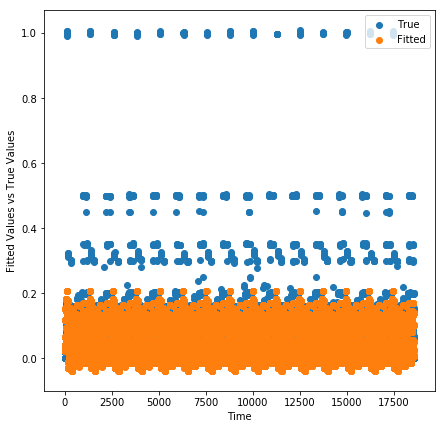

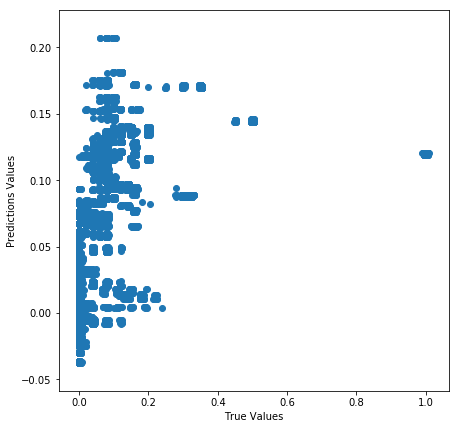

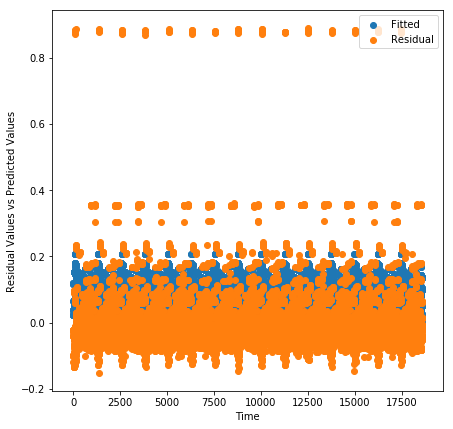

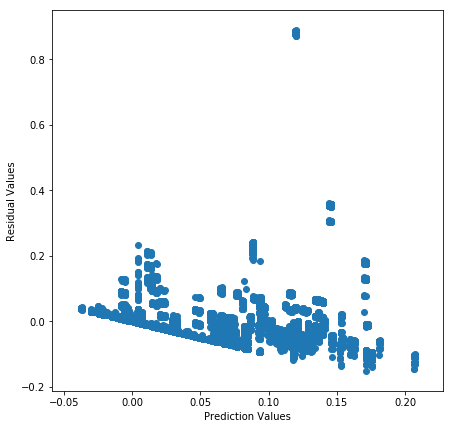

In [343]:
print("Best model for Unregularised Regression")
temp = transform(X_train, [0,1,1,1,0])
lr = LinearRegression()
lr.fit(temp, Y_train)
predictions = lr.predict(temp)
print("Average Train RMSE:")
print(math.sqrt(metrics.mean_squared_error(Y_train, lr.predict(temp))))
plot_un(predictions,Y_train,"")

Best model for Regularised Regression (Elastic Net with alpha and lambda1, both = 0.2
Average Train RMSE:
0.10302789521822923


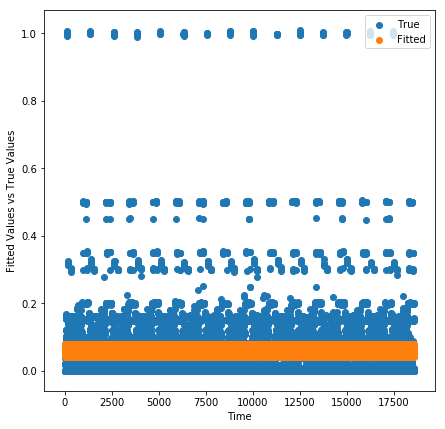

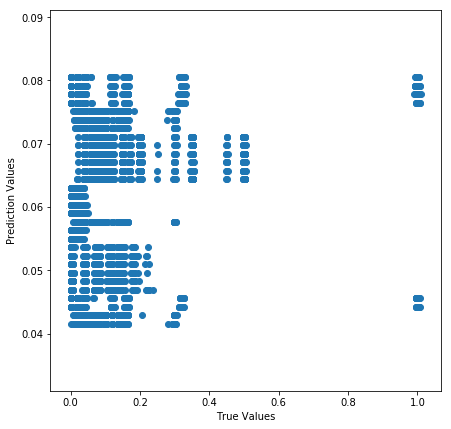

In [ ]:
print("Best model for Regularised Regression (Elastic Net with alpha and lambda1, both = 0.2")

temp = X_train
lr = sklearn.linear_model.ElasticNet(alpha = 0.2,l1_ratio = 0.2)
lr.fit(temp, Y_train)
predictions = lr.predict(temp)
print("Average Train RMSE:")
print(math.sqrt(metrics.mean_squared_error(Y_train, lr.predict(temp))))
plot_r(predictions,Y_train)